In [56]:
import numpy as np
import pandas as pd

In [57]:
train = pd.read_csv('train.csv')

In [58]:
train.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [59]:
test=pd.read_csv('test.csv')

In [60]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [61]:
submission = pd.read_csv('Sample_Submission.csv')

In [62]:
submission.head()
test_to_check=submission['Purchase']
test_to_check.to_csv(r'C:\Users\sk\AnacondaProjects\blackfriday\test_to_check.csv')
res=np.array(submission['Purchase'])

In [63]:
print(train.shape)
print(test.shape)
print(submission.shape)

(550068, 12)
(233599, 11)
(233599, 3)


In [64]:
frames=[train,test]
input=pd.concat(frames)
input.to_csv(r'C:\Users\sk\AnacondaProjects\blackfriday\input_total.csv')
print (input.shape)
print(input.head())

(783667, 12)
    Age City_Category Gender  Marital_Status  Occupation  Product_Category_1  \
0  0-17             A      F               0          10                   3   
1  0-17             A      F               0          10                   1   
2  0-17             A      F               0          10                  12   
3  0-17             A      F               0          10                  12   
4   55+             C      M               0          16                   8   

   Product_Category_2  Product_Category_3 Product_ID  Purchase  \
0                 NaN                 NaN  P00069042    8370.0   
1                 6.0                14.0  P00248942   15200.0   
2                 NaN                 NaN  P00087842    1422.0   
3                14.0                 NaN  P00085442    1057.0   
4                 NaN                 NaN  P00285442    7969.0   

  Stay_In_Current_City_Years  User_ID  
0                          2  1000001  
1                          2 

In [65]:
input.head()


,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


In [66]:
input.dtypes

Age                            object
City_Category                  object
Gender                         object
Marital_Status                  int64
Occupation                      int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Product_ID                     object
Purchase                      float64
Stay_In_Current_City_Years     object
User_ID                         int64
dtype: object

In [67]:
input.fillna(999,inplace=True)

In [68]:
input.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,999.0,999.0,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,999.0,999.0,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.0,999.0,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,999.0,999.0,P00285442,7969.0,4+,1000002


In [69]:
target=input.Purchase

In [70]:
target=np.array(target)

In [71]:
input.drop(['Purchase'],axis=1,inplace=True)

In [72]:
print(input.columns,input.dtypes)

Index(['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Product_ID', 'Stay_In_Current_City_Years', 'User_ID'],
      dtype='object') Age                            object
City_Category                  object
Gender                         object
Marital_Status                  int64
Occupation                      int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Product_ID                     object
Stay_In_Current_City_Years     object
User_ID                         int64
dtype: object


In [73]:
input=input.applymap(str)
input.dtypes

Age                           object
City_Category                 object
Gender                        object
Marital_Status                object
Occupation                    object
Product_Category_1            object
Product_Category_2            object
Product_Category_3            object
Product_ID                    object
Stay_In_Current_City_Years    object
User_ID                       object
dtype: object

In [74]:
input_pd=input.copy()

In [75]:
from sklearn import preprocessing
from sklearn.feature_extraction import DictVectorizer


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import linear_model

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error

In [76]:
input=np.array(input)

for i in range(input.shape[1]):
    lbl=preprocessing.LabelEncoder()
    lbl.fit(list(input[:,i]))
    input[:,i]=lbl.transform(input[:,i])

In [77]:
print(input[4])

[6 2 1 0 8 18 17 15 2769 4 1]


In [78]:
input=input.astype(int)

In [79]:
import xgboost as xgb
#xgboost model

In [80]:
params={}
params['min_child_weight']=10
params['subsample']=0.7
params['colsample_bytree']=0.7
params['scale_pos_weight']=0.8
params['silent']=1
params['max_depth']=6
params['nthread']=6
params['objective']='reg:linear'
params['eta']=0.1
params['base_score']=1800
params['eval_metric']='rmse'
params['seed']=0
plst=list(params.items())
num_rounds=300

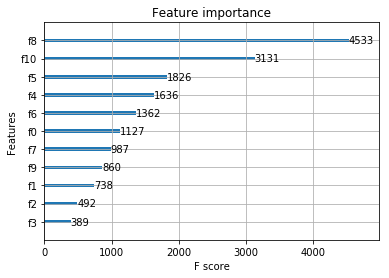

{'f0': 126083841.39129546,
 'f1': 238378383.7134553,
 'f10': 193910198.75650272,
 'f2': 92954207.15447155,
 'f3': 97840719.41645244,
 'f4': 109823364.47848412,
 'f5': 16769464181.98379,
 'f6': 1144273232.8295887,
 'f7': 865824058.9723403,
 'f8': 684836281.6213766,
 'f9': 102460940.94430234}

In [81]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
xgtrain=xgb.DMatrix(input[:train.shape[0],:],label=target[:train.shape[0]])
watchlist=[(xgtrain,'train')]
model_1_xgboost=xgb.train(plst,xgtrain,num_rounds)
plot_importance(model_1_xgboost)
plt.show()
'''print(model_1_xgboost.feature_importances_)
plt.bar(range(len(model_1_xgboost.feature_importances_)),model_1_xgboost.feature_importances_)
plt.show()'''
model_1_xgboost.get_score(importance_type='gain')


In [82]:
model_1_predict=model_1_xgboost.predict(xgb.DMatrix(input[train.shape[0]:,:]))
model_1_predict[model_1_predict<0]=25
submission.Purchase=model_1_predict
#submission.to_csv('../submission/submit_13.csv',index=False)
test_to_check=submission['Purchase']
test_to_check.to_csv(r'C:\Users\sk\AnacondaProjects\blackfriday\test_to_check.csv')

In [83]:
print(submission)

        User_ID Product_ID      Purchase
0       1000004  P00128942  15300.768555
1       1000009  P00113442  11046.294922
2       1000010  P00288442   6833.807129
3       1000010  P00145342   2857.034180
4       1000011  P00053842   2299.368652
5       1000013  P00350442  10489.735352
6       1000013  P00155442  12089.356445
7       1000013   P0094542   9814.919922
8       1000015  P00161842  12556.844727
9       1000022  P00067942   5222.706055
10      1000026  P00046742  14146.349609
11      1000026  P00040042   4620.926758
12      1000026  P00196542   5893.847656
13      1000026  P00004542   5579.830078
14      1000028  P00159542  16736.949219
15      1000029  P00111542  13166.423828
16      1000033  P00121042  15811.344727
17      1000033  P00344442   6019.159180
18      1000034  P00265242   7724.531250
19      1000035   P0096642  10922.911133
20      1000036  P00303042   6883.804688
21      1000036  P00059642  15128.433594
22      1000042  P00030842  14829.981445
23      1000045 

In [84]:
submission.to_csv(r'C:\Users\sk\AnacondaProjects\blackfriday\submit_xgboost.csv',index=False)

In [96]:

early_stopping=10
cv=xgb.cv (params,xgtrain,50,nfold=5,early_stopping_rounds=early_stopping, verbose_eval=1)
print(cv.mean(),cv.std())

[0]	train-rmse:8326.14+2.94996	test-rmse:8326.19+12.3312
[1]	train-rmse:7658.58+58.8422	test-rmse:7658.65+65.6778
[2]	train-rmse:7068.71+97.7133	test-rmse:7068.81+95.8446
[3]	train-rmse:6533.33+57.0043	test-rmse:6533.22+53.5358
[4]	train-rmse:6044.63+94.8667	test-rmse:6044.49+91.2869
[5]	train-rmse:5612.83+82.9465	test-rmse:5612.89+78.2282
[6]	train-rmse:5264.58+40.8786	test-rmse:5264.96+37.0614
[7]	train-rmse:4946.07+68.307	test-rmse:4946.5+68.4038
[8]	train-rmse:4635.86+57.7096	test-rmse:4636.49+58.0789
[9]	train-rmse:4402.8+47.4362	test-rmse:4403.62+49.6353
[10]	train-rmse:4181.28+58.8049	test-rmse:4182.38+63.6757
[11]	train-rmse:4030.2+72.374	test-rmse:4031.4+75.6029
[12]	train-rmse:3877.62+72.8604	test-rmse:3879.07+76.321
[13]	train-rmse:3718.02+60.9663	test-rmse:3719.67+63.9805
[14]	train-rmse:3581.36+52.409	test-rmse:3583.23+54.9733
[15]	train-rmse:3471.24+39.3609	test-rmse:3473.23+41.6566
[16]	train-rmse:3388.44+26.5429	test-rmse:3390.4+29.8892
[17]	train-rmse:3317.65+38.239	te

In [97]:
#second model
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(input.astype(int))

In [98]:
tfidf

<783667x11 sparse matrix of type '<class 'numpy.float64'>'
	with 7318716 stored elements in Compressed Sparse Row format>

In [99]:
input_tfidf=tfidf.toarray()

In [100]:
params = {}
params["min_child_weight"] = 10
params["subsample"] = 0.7
params["colsample_bytree"] = 0.7
params["scale_pos_weight"] = 0.8
params["silent"] = 1
params["max_depth"] = 12
params["nthread"] = 6
#params["gamma"] = 1
params["objective"] = "reg:linear"
params["eta"] = 0.1
params["base_score"] = 1800
params["eval_metric"] = "rmse"
params["seed"] = 0

plst = list(params.items())
num_rounds = 1800

In [101]:
xgtrain = xgb.DMatrix(input_tfidf[:train.shape[0],:], label=target[:train.shape[0]])
watchlist = [(xgtrain, 'train')]
model_1_xgboost = xgb.train(plst, xgtrain, num_rounds)

In [102]:
model_1_predict = model_1_xgboost.predict(xgb.DMatrix(input_tfidf[train.shape[0]:,:]))
model_1_predict[model_1_predict<0] = 25
submission.Purchase = model_1_predict
submission.to_csv(r'C:\Users\sk\AnacondaProjects\blackfriday\submit_xgboost_tfidf.csv',index=False)

early_stopping=10
cv=xgb.cv(params,xgtrain,50,nfold=5,early_stopping_rounds=early_stopping, verbose_eval=1)
print(cv.mean(),cv.std())

[0]	train-rmse:8318.54+3.09273	test-rmse:8323.19+12.3731
[1]	train-rmse:7689.1+47.102	test-rmse:7697.18+55.4565
[2]	train-rmse:7125.53+68.7822	test-rmse:7137.25+69.2255
[3]	train-rmse:6627.9+40.0221	test-rmse:6643.88+40.8092
[4]	train-rmse:6175.9+65.1232	test-rmse:6195.91+63.7328
[5]	train-rmse:5776.98+51.2547	test-rmse:5801.85+48.7318
[6]	train-rmse:5447.59+24.8923	test-rmse:5478.13+24.7198
[7]	train-rmse:5148.19+44.0996	test-rmse:5184.01+47.4186
[8]	train-rmse:4866.61+37.4918	test-rmse:4907.48+41.2358
[9]	train-rmse:4651.28+34.7541	test-rmse:4698.26+41.0349
[10]	train-rmse:4450.4+49.9343	test-rmse:4502.92+58.1262
[11]	train-rmse:4301.06+56.1844	test-rmse:4360.29+62.8836
[12]	train-rmse:4159.44+58.9134	test-rmse:4224.78+65.0268
[13]	train-rmse:4018.34+51.1001	test-rmse:4089.49+57.13
[14]	train-rmse:3895.85+41.6571	test-rmse:3972.26+48.3499
[15]	train-rmse:3792.96+33.6571	test-rmse:3874.42+40.1782
[16]	train-rmse:3716.04+23.4102	test-rmse:3803.48+32.7461
[17]	train-rmse:3646.4+34.9641	

In [103]:
#third model
input_w_tfidf=np.concatenate((input,input_tfidf),axis=1)

In [104]:
params = {}
params["min_child_weight"] = 10
params["subsample"] = 0.7
params["colsample_bytree"] = 0.7
params["scale_pos_weight"] = 0.8
params["silent"] = 1
params["max_depth"] = 8
params["nthread"] = 6
#params["gamma"] = 1
params["objective"] = "reg:linear"
params["eta"] = 0.1
params["base_score"] = 1800
params["eval_metric"] = "rmse"
params["seed"] = 0

plst = list(params.items())
num_rounds = 1750

xgtrain=xgb.DMatrix(input_w_tfidf[:train.shape[0],:],label=target[:train.shape[0]])
watchlist=[(xgtrain,'train')]
model_1_xgboost = xgb.train(plst, xgtrain, num_rounds)

model_1_predict = model_1_xgboost.predict(xgb.DMatrix(input_w_tfidf[train.shape[0]:,:]))
model_1_predict[model_1_predict<0] = 25
submission.Purchase = model_1_predict
submission.to_csv(r"C:\Users\sk\AnacondaProjects\blackfriday\third_model.csv", index=False)

early_stopping=10
cv=xgb.cv(params,xgtrain,50,nfold=5,early_stopping_rounds=early_stopping, verbose_eval=1)
print(cv.mean(),cv.std())

[0]	train-rmse:8256.93+2.54563	test-rmse:8257.18+12.6469
[1]	train-rmse:7567.19+37.7388	test-rmse:7567.56+37.3852
[2]	train-rmse:6978.68+78.2502	test-rmse:6979.53+79.2647
[3]	train-rmse:6428.05+92.9816	test-rmse:6429.48+95.0165
[4]	train-rmse:5932.77+73.4161	test-rmse:5934.73+73.9507
[5]	train-rmse:5495.05+63.4562	test-rmse:5497.49+62.3264
[6]	train-rmse:5130.84+60.4316	test-rmse:5133.67+55.1301
[7]	train-rmse:4798.5+35.7103	test-rmse:4802.25+30.1517
[8]	train-rmse:4517.22+35.7841	test-rmse:4521.76+36.8793
[9]	train-rmse:4264.1+21.7762	test-rmse:4269.43+21.43
[10]	train-rmse:4045.9+21.0686	test-rmse:4051.84+21.7542
[11]	train-rmse:3845.34+18.9074	test-rmse:3852.09+19.3222
[12]	train-rmse:3681.18+24.9011	test-rmse:3688.73+20.8567
[13]	train-rmse:3540.75+31.3852	test-rmse:3549.22+25.5737
[14]	train-rmse:3424.42+27.1194	test-rmse:3433.88+21.9143
[15]	train-rmse:3324.69+23.5498	test-rmse:3335.3+19.2145
[16]	train-rmse:3240.65+28.6902	test-rmse:3252.45+26.2518
[17]	train-rmse:3163.91+23.861

In [105]:
print (train.shape, train[train.Marital_Status==0].shape)

(550068, 12) (324731, 12)


In [106]:
#fourth model
model_4_et = ExtraTreesRegressor(n_estimators=1450, max_depth=8,min_samples_split=10, min_samples_leaf=10, oob_score=True, n_jobs=6, random_state=123, verbose=1, bootstrap=True)
model_4_et.fit(input_w_tfidf[:train.shape[0],:], target[:train.shape[0]])

[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   45.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  7.8min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 15.2min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 26.1min
[Parallel(n_jobs=6)]: Done 1450 out of 1450 | elapsed: 29.9min finished


ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=8,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=10, min_samples_split=10,
          min_weight_fraction_leaf=0.0, n_estimators=1450, n_jobs=6,
          oob_score=True, random_state=123, verbose=1, warm_start=False)

In [107]:
model_4_predict = model_4_et.predict(input_w_tfidf[train.shape[0]:,:])

[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    2.7s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    5.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    8.1s
[Parallel(n_jobs=6)]: Done 1450 out of 1450 | elapsed:    9.4s finished


In [108]:
submission.Purchase = model_4_predict
submission.to_csv(r"C:\Users\sk\AnacondaProjects\blackfriday\fourth_model.csv", index=False)

In [109]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
temp=pd.read_csv('Sample_Submission.csv')
temp_sample=temp['Purchase']
temp=pd.read_csv('submit_xgboost.csv')
temp_first=temp['Purchase']
print (np.sqrt(mean_squared_error(temp_sample, temp_first)))
temp=pd.read_csv('submit_xgboost_tfidf.csv')
temp_second=temp['Purchase']
print (np.sqrt(mean_squared_error(temp_sample, temp_second)))
temp=pd.read_csv('third_model.csv')
temp_third=temp['Purchase']
print (np.sqrt(mean_squared_error(temp_sample, temp_third)))
temp=pd.read_csv('fourth_model.csv')
temp_fourth=temp['Purchase']
print (np.sqrt(mean_squared_error(temp_sample, temp_fourth)))
print (np.sqrt(mean_squared_error(temp_fourth, temp_first)))

4124.88950007
4057.15709681
4267.88371959
3727.30867414
1023.26036168


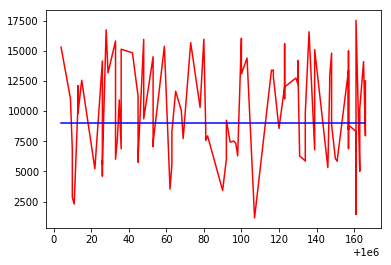

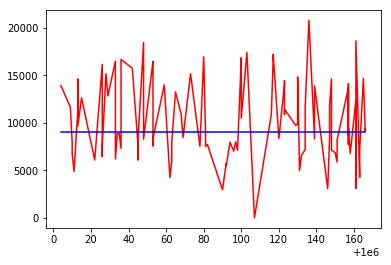

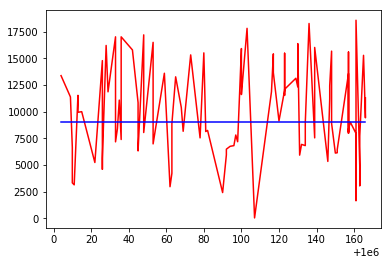

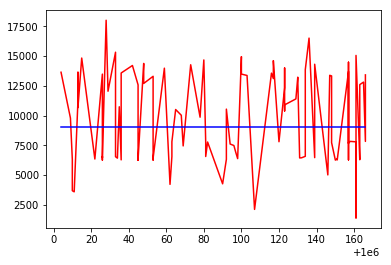

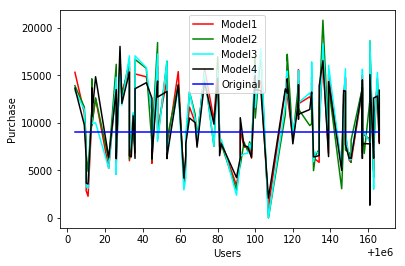

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
temp=pd.read_csv('Sample_Submission.csv')
temp_first=pd.read_csv('submit_xgboost.csv')
x1=temp_first['User_ID'].astype(int)
plt.plot(x1[:100],temp_first['Purchase'][:100],color='red')
x=temp['User_ID'].astype(int)
plt.plot(x[:100],temp['Purchase'][:100],color='blue')
plt.show()

temp_second=pd.read_csv('submit_xgboost_tfidf.csv')
x2=temp_second['User_ID'].astype(int)
plt.plot(x2[:100],temp_second['Purchase'][:100],color='red')
plt.plot(x[:100],temp['Purchase'][:100],color='blue')
plt.show()

temp_third=pd.read_csv('third_model.csv')
x3=temp_third['User_ID'].astype(int)
plt.plot(x3[:100],temp_third['Purchase'][:100],color='red')
plt.plot(x[:100],temp['Purchase'][:100],color='blue')
plt.show()

temp_fourth=pd.read_csv('fourth_model.csv')
x4=temp_fourth['User_ID'].astype(int)
plt.plot(x4[:100],temp_fourth['Purchase'][:100],color='red')
plt.plot(x[:100],temp['Purchase'][:100],color='blue')
plt.show()


#plotting all together

plt.plot(x1[:100],temp_first['Purchase'][:100],color='red',label='Model1')
plt.plot(x2[:100],temp_second['Purchase'][:100],color='green',label='Model2')
plt.plot(x3[:100],temp_third['Purchase'][:100],color='cyan',label='Model3')
plt.plot(x4[:100],temp_fourth['Purchase'][:100],color='black',label='Model4')
plt.plot(x[:100],temp['Purchase'][:100],color='blue',label='Original')
plt.legend(loc='best')
plt.xlabel('Users')
plt.ylabel('Purchase')
plt.show()